
# Component 2: Vector Quantization


In [11]:
import sys
sys.path.append("Components")
from vector_quantization import fit_kmeans, vq_query


import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt

# Optional: configure numpy print
np.set_printoptions(precision=4, suppress=True)

print("✓ Libraries loaded.")


✓ Libraries loaded.


In [10]:
# ============================================
# Component 2: Vector Quantization (KMeans)
# Block 2 — Load dense document vectors
# ============================================

# Load the dense vectors from Component 1 (Word2Vec)
doc_vectors = np.load("Data/processed/doc_vectors_w2v.npy")

print("✓ Document vectors loaded.")
print(f"Shape of doc_vectors: {doc_vectors.shape}")

# Optional: load metadata (titles, decades)
metadata = pd.read_csv("Data/processed/doc_metadata.csv")

print(f"✓ Metadata loaded: {metadata.shape[0]} records")
metadata.head(3)


✓ Document vectors loaded.
Shape of doc_vectors: (17830, 200)
✓ Metadata loaded: 17830 records


,title,decade
0,'Gator Bait,1970s
1,...And Justice for All (film),1970s
2,10 (1979 film),1970s


In [12]:
k = 200
kmeans, assignments = fit_kmeans(doc_vectors, k=k)


In [16]:
# Component 2 — Vector Quantization
# Block 4: example query using VQ

# Choose a query document (you can change this index)
QUERY_INDEX = 1

query_vec = doc_vectors[QUERY_INDEX]

print("Query document")
print("-" * 60)
print(f"  index : {QUERY_INDEX}")
print(f"  title : {metadata.loc[QUERY_INDEX, 'title']}")
print(f"  decade: {metadata.loc[QUERY_INDEX, 'decade']}")

# Find nearest neighbors within the same VQ cluster
TOP_N = 10
indices, distances = vq_query(
    query_vec=query_vec,
    X=doc_vectors,
    kmeans=kmeans,
    assignments=assignments,
    top_n=TOP_N
)

print("\nNearest neighbors (VQ, same cluster):")
print("-" * 60)
for rank, (idx, dist) in enumerate(zip(indices, distances), start=1):
    title = metadata.loc[idx, "title"]
    decade = metadata.loc[idx, "decade"]
    print(f"{rank:2d}. idx={idx:5d} | dist={dist:.4f} | {title} ({decade})")


Query document
------------------------------------------------------------
  index : 1
  title : ...And Justice for All (film)
  decade: 1970s

Nearest neighbors (VQ, same cluster):
------------------------------------------------------------
 1. idx=    1 | dist=0.0000 | ...And Justice for All (film) (1970s)
 2. idx= 5182 | dist=0.2273 | Guilty as Sin (1990s)
 3. idx=17665 | dist=0.2431 | The Trial of the Chicago 7 (2020s)
 4. idx= 3872 | dist=0.2444 | The Verdict (1980s)
 5. idx= 8438 | dist=0.2482 | Find Me Guilty (2000s)
 6. idx= 6016 | dist=0.2499 | Primal Fear (film) (1990s)
 7. idx= 2490 | dist=0.2520 | From the Hip (film) (1980s)
 8. idx= 5770 | dist=0.2531 | Murder in the First (film) (1990s)
 9. idx= 3520 | dist=0.2536 | The Accused (1988 film) (1980s)
10. idx= 3021 | dist=0.2547 | Nuts (1987 film) (1980s)


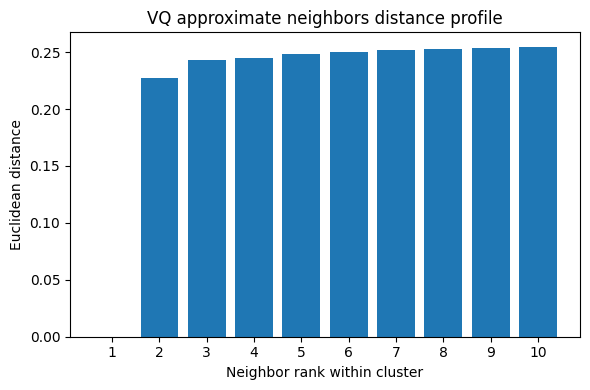

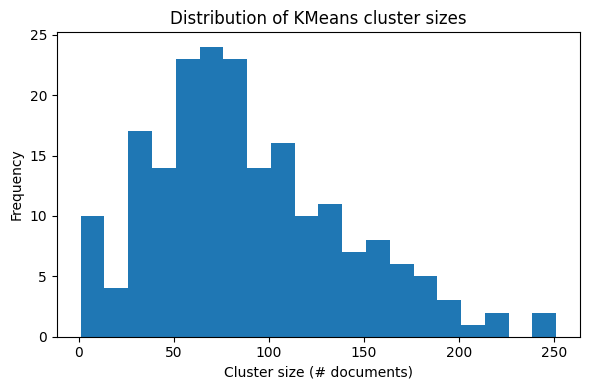

In [17]:
# Component 2 — Vector Quantization
# Block 5: simple visualizations

import matplotlib.pyplot as plt
import numpy as np

# --- 1) Distance profile of the TOP_N neighbors ---
plt.figure(figsize=(6, 4))
plt.bar(range(len(distances)), distances)
plt.xticks(range(len(distances)), [str(i) for i in range(1, len(distances) + 1)])
plt.xlabel("Neighbor rank within cluster")
plt.ylabel("Euclidean distance")
plt.title("VQ approximate neighbors distance profile")
plt.tight_layout()
plt.show()

# --- 2) Cluster size distribution ---
cluster_sizes = np.bincount(assignments)

plt.figure(figsize=(6, 4))
plt.hist(cluster_sizes, bins=20)
plt.xlabel("Cluster size (# documents)")
plt.ylabel("Frequency")
plt.title("Distribution of KMeans cluster sizes")
plt.tight_layout()
plt.show()
